# Regression and Gauss-Markov assumptions

In [12]:
import numpy as np

## Exercise T2.1 Gross national product

a) Calculate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$ of the simple linear regression model using ordinary least
squares. Find the regression line using the formulas below

$\hat{\beta}_1 = \dfrac{cov(x,y)}{var(x)}$  

$cov(x,y) = (\dfrac{1}{n} \sum x_iy_i) - \overline{x}*\overline{y} = \dfrac{1}{9} * 2914.3 - 3.78 * 63$

In [37]:
# b1
b1 = round((2914.3 / 9 - 3.78 * 63) / ((262.22 / 9) - 3.78**2), 3)
b1

5.77

In [39]:
# b0
b0 = round(63 - b1 * 3.78, 2)
b0

# 41.19

41.19

b) Interpret the coefficients calculated in exercise a).

increase in 1 unit in X will yield an approximate 5.77 percentage of Y (?)

c) Test the zero hypothesis H0 : β1 ≤ 0 with significance level of α = 0.05. Use the following t-test
with a residual sum of squares of RSS = 4,411.4 and Pn
i=1(xi − ¯x)2 = 133.77

In [35]:
# SE(b_1)
SEb1 = np.sqrt((4411.4 / (133.77**2)) * 1/(9-2))
print(SEb1)

# t_0
t0 = b1 / SEb1
t0

# t0 = 2.66
# critical value = 1.852 ?

0.1876637854170505


456.51322555180764

d) Now the above linear regression model will be used to estimate the percentage of literates among a country with known gross national product. Which problems might occur? Briefly explain your concerns using an example.

If you put in a very big or very small BDP country, the % literacy either explodes over 100 or drops below 0, which makes no sense.

-----

![ttable.png](ttable.png)

## Exercise T2.2 Testing Gauss-Markov assumptions
statsmodels.org

For this exercise, we recommend using `statsmodels`. 
Unless you haven't already installed it, you can do so by running
```bash
pip install statsmodels
```

*Make sure you have activated your `baml-venv` environment before doing so!*

## Imports and data loading

In [46]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv("gauss-markov.csv")
data.head(10)

,x1,x2,x3,y
0,-10.000000,13.593745,-86.999140,212.205325
1,-9.899497,6.640181,-56.314647,185.576520
2,-9.798995,11.001845,-77.000938,201.213858
3,-9.698492,9.754249,-70.062754,193.069946
4,-9.597990,12.606083,-81.346834,200.385392
5,-9.497487,12.596451,-82.014682,197.140433
6,-9.396985,5.579366,-50.366159,170.293901
7,-9.296482,3.062096,-39.131473,158.506427
8,-9.195980,6.999276,-55.432802,170.484964
9,-9.095477,11.487830,-75.768802,181.682421


## a)

We start by using the simple linear regression model
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3
$$

Using [``sm.OLS``](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html), compute optimal values for the parameters.

> Note: You may want to use ``sm.add_constant`` to add values for the intercept.



In [137]:
# Prepare input data
X = sm.add_constant(data[["x1", "x2", "x3"]])
y = data["y"]

In [138]:
# Fit a linear model with statsmodels
model = sm.OLS(y, X)
results = model.fit()

In [139]:
# Show the results using the summary() function
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     128.6
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           4.52e-46
Time:                        11:20:18   Log-Likelihood:                -963.30
No. Observations:                 200   AIC:                             1935.
Df Residuals:                     196   BIC:                             1948.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.7239      6.241      5.083      0.0

Use the model to predict the $y$-values

In [148]:
predicted_values = results.predict(X) # or model.predict(results.params, X)

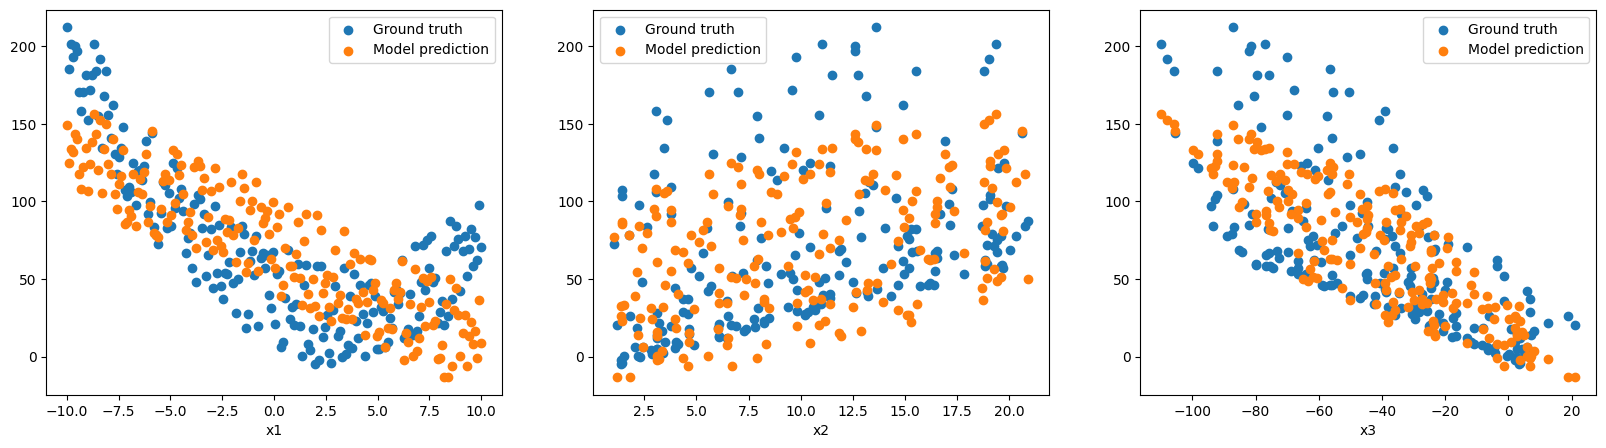

In [149]:
# Visualization of the predicted variables vs. the true variables
# NOTHING TO DO here
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for ax, variable_name in zip(axs, ["x1", "x2", "x3"]):
    ax.scatter(data[variable_name], data["y"], label="Ground truth")
    ax.scatter(data[variable_name], predicted_values, label="Model prediction")
    ax.legend()
    ax.set_xlabel(variable_name)

## b)

Compute the residuals $e = \hat{y} - y$ of the resulting model.

In [150]:
residuals = predicted_values - y

Plot the residuals over the input variables $x_1$ and $x_2$. What do you observe?

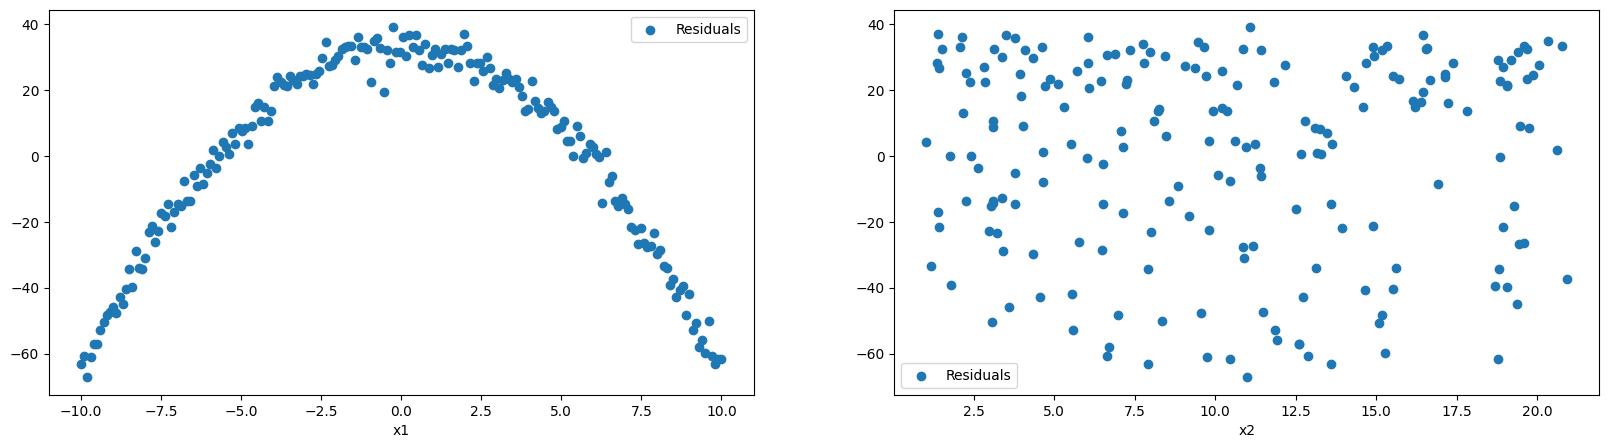

In [151]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
for ax, variable_name in zip(axs, ["x1", "x2"]):
    ax.scatter(data[variable_name], residuals, label="Residuals")
    ax.legend()
    ax.set_xlabel(variable_name)

Using a White test ([`statsmodels.stats.diagnostic.het_white`](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_white.html)), show that the linear model does not satisfy homoscedasticity.

In [153]:
from statsmodels.stats.diagnostic import het_white

statistic, p_value, _, _ = het_white(residuals, X)

print(statistic, p_value)
# very certain that homodasticity is violated - bad, because something is something

73.7438820947117 2.796049047456969e-12


## c)

Consider the alternative model
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_1^2
$$

Compute the optimal parameter values. You should observe that the $R^2$ value improves drastically over the previous model.

In [154]:
# Prepare input data
Xc = X.copy()
x1_squared = np.square(X["x1"])
Xc["x1_squared"] = x1_squared

# Fit a linear model
model = sm.OLS(y, Xc)
results = model.fit()

In [155]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.329e+05
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:24:15   Log-Likelihood:                -280.99
No. Observations:                 200   AIC:                             572.0
Df Residuals:                     195   BIC:                             588.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9063      0.217     18.032      0.0

In [156]:
predicted_values1 = results.predict(Xc)

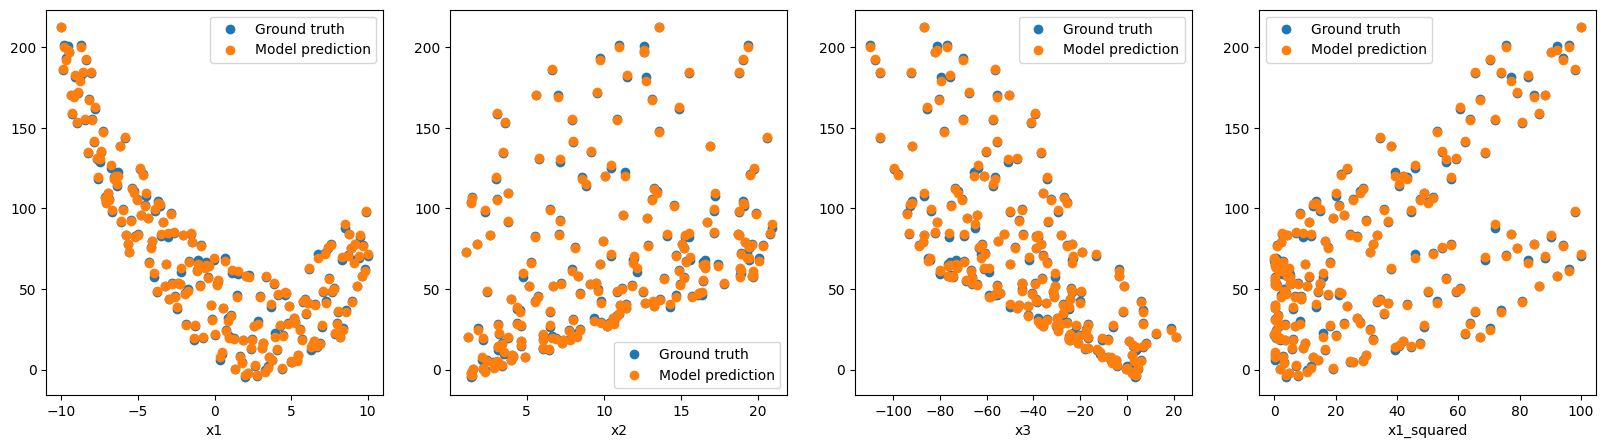

In [157]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for ax, variable_name in zip(axs, ["x1", "x2", "x3", "x1_squared"]):
    ax.scatter(Xc[variable_name], data["y"], label="Ground truth")
    ax.scatter(Xc[variable_name], predicted_values1, label="Model prediction")
    ax.legend()
    ax.set_xlabel(variable_name)

Although this model gives a very good fit of the data, there is another problem.
Use the Variance inflation factor ([`statsmodels.stats.outliers_influence.variance_inflation_factor`](https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)) to check whether the variables are dependent.

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# print(vif(Xc, 0)) # const
print(vif(Xc, 1))
print(vif(Xc, 2))
print(vif(Xc, 3))
print(vif(Xc, 4))

355.3505135936152
752.4661591277431
1080.2717686551946
1.0113146536308202


In [160]:
# Check pvalue
# We get high p value meaning we can no longer reject null hypothesis about homoscedasticity

## d)
Consider a third model:
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1^2
$$

Compute the optimal parameter values.

In [ ]:
# Prepare input data
# TODO

# Fit a linear model
# TODO
model = "..."
results = "..."

Check if the model has multicollinear input variables using the VIF.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# TODO

Check if the model satisfies the homoscedasticity assumption using the White test.

In [ ]:
from statsmodels.stats.diagnostic import het_white

# TODO

In [ ]:
# Visualization of the predicted variables vs. the true variables
# NOTHING TO DO here
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for ax, variable_name in zip(axs, ["x1", "x2", "x3"]):
    ax.scatter(data[variable_name], data["y"], label="Ground truth")
    ax.scatter(data[variable_name], model.predict(results.params, X), label="Model prediction")
    ax.legend()
    ax.set_xlabel(variable_name)

Outcome of the exercise:  
VIF meaning  
homoscedasticity, how to test for it,  
multicolinearity, what issues it brings

---

## Exercise T2.3 Derivation of closed-form solution